MobileNetV2 model training on CIFAR-10 dataset (Any other suitable pre trained model like ResNet-50 can also be used on this dataset)

Mounted at /content/drive
9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
1563/1563 [==============================] - 41s 21ms/step - loss: 0.7692 - accuracy: 0.7339 - val_loss: 0.6362 - val_accuracy: 0.7805
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6096 - accuracy: 0.7860 - val_loss: 0.5862 - val_accuracy: 0.7977
Epoch 3/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.5556 - accuracy: 0.8046 - val_loss: 0.5618 - val_accuracy: 0.8056
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5182 - accuracy: 0.8172 - val_loss: 0.5611 - val_accuracy: 0.8067
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4869 - accuracy: 0.8260 - val_loss: 0.5568 - val_accuracy: 0.8099
Epoch 6/10
1563/1563 [==============================] - 28s 17ms/step - loss: 0.4596 - accuracy: 0.8354 - val_loss: 0.5640 - val_accuracy: 0.8096
Epoch 7/10
1563/1563 [=============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/cifar10_mobilenetv2.h5
313/313 [==============================] - 4s 10ms/step


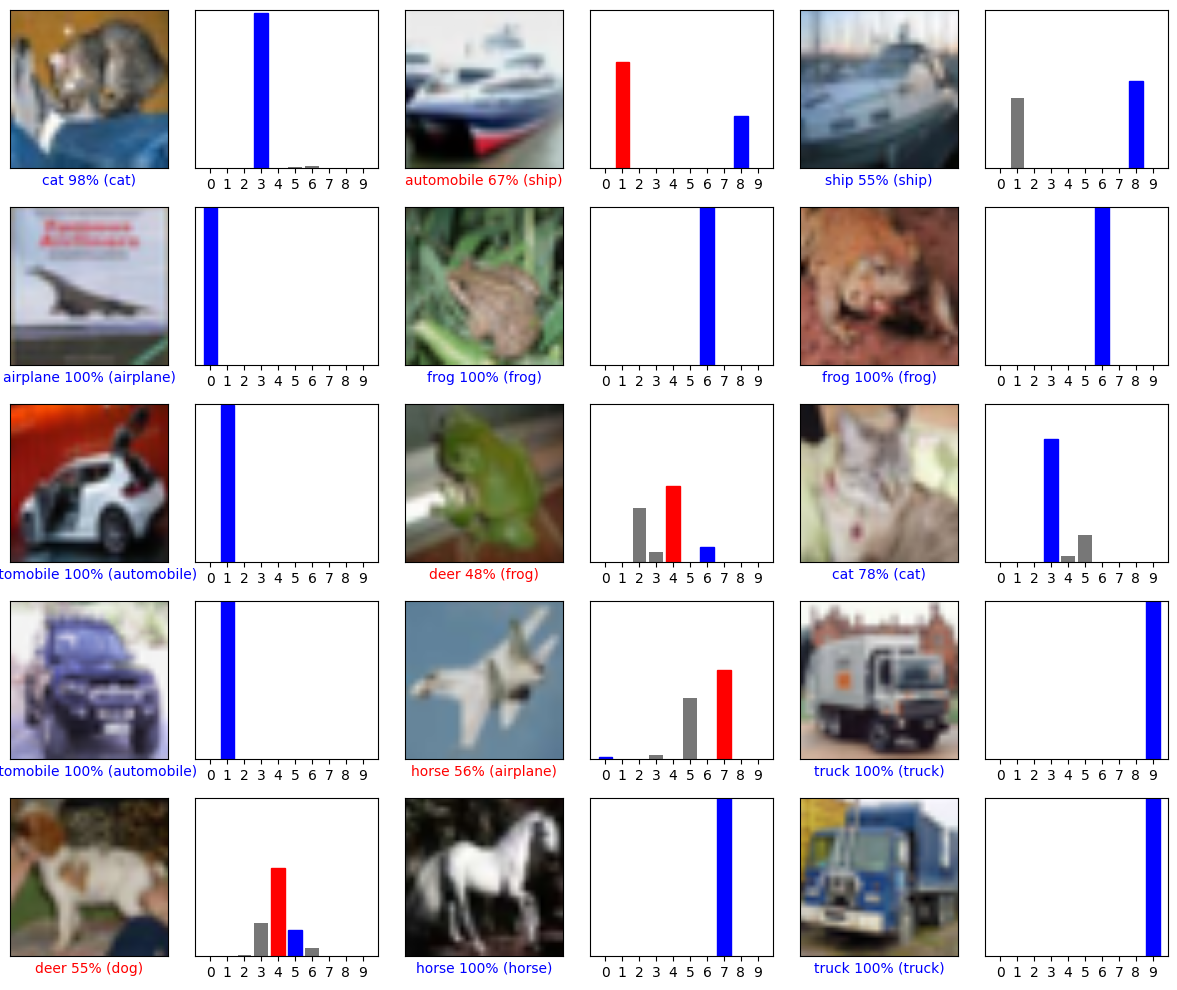

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import gc
drive.mount('/content/drive')
model_save_path = '/content/drive/My Drive/cifar10_mobilenetv2.h5'
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#Resize images to 96x96 as MobileNetV2 expects at least 32x32 image size
train_images = tf.image.resize(train_images, (96, 96))
test_images = tf.image.resize(test_images, (96, 96))
#Create the base model from the pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(96, 96, 3),
                         include_top=False,
                         weights='imagenet')
#Freeze the base model to add new layers
base_model.trainable = False
#Adding new layers on top of the pre trained models
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
#Compiling the layers into the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Training callback to clear the cache
class ClearCache(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()
#Train the model with the ClearCache callback to efficiently use GPU
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[ClearCache()])
#Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
#Save the model to Google Drive
model.save(model_save_path)
print(f'Model saved to {model_save_path}')
#Function to plot the images and the model's predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label[0]]),
                                  color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

#Making Predictions
predictions = model.predict(test_images)
# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


The Pretrained model after training on the CIFAR-10 dataset was evaluated by having 81% testing accuracy.